<a href="https://colab.research.google.com/github/gzanellato-ia/03-MAIR-GZ-publico/blob/master/Aprendizaje_Supervisado/programa12_regresionOLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from math import sqrt
from pprint import pprint
from sklearn import datasets
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn import linear_model, metrics
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

In [3]:
# Carga de datos.
datos = datasets.load_boston()
datos.data.shape

(506, 13)

In [4]:
# Algoritmo de aprendizaje.
reg = linear_model.LinearRegression()

In [5]:
# Métricas de evaluación.
metricas = {
  'MAE':  metrics.mean_absolute_error,
  'RMSE': lambda y, y_pred:
          sqrt(metrics.mean_squared_error(y, y_pred)),
  'MAPE': lambda y, y_pred:
          np.mean(np.abs((y - y_pred) / y)) * 100,
  'R2':   metrics.r2_score}

In [6]:
# Entrenamiento con todos los datos para obtener los coeficientes del modelo con todos los datos.
modelo = reg.fit(datos.data, datos.target)

In [7]:
# Obtención de los coeficientes del modelo.
modelo.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [8]:
# Obtención del término independiente del modelo.
modelo.intercept_

36.459488385090125

In [9]:
# Validación y obtención de las predicciones del modelo.
seed = 1
y_pred = cross_val_predict(reg, datos.data, datos.target,
         cv = KFold(n_splits=10, random_state=seed, shuffle=True))

In [10]:
# Cálculo de las métricas de evaluación.
MAE = metricas['MAE'](datos.target, y_pred)
RMSE = metricas['RMSE'](datos.target, y_pred)
MAPE = metricas['MAPE'](datos.target, y_pred)
R2 = metricas['R2'](datos.target, y_pred)

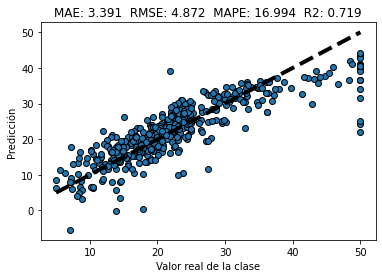

In [11]:
# Gráfica de realidad vs. predicción.
fig, ax = plt.subplots()
ax.scatter(datos.target, y_pred, edgecolors=(0, 0, 0))
ax.plot([datos.target.min(), datos.target.max()],
        [datos.target.min(), datos.target.max()], 'k--', lw=4)
ax.set_xlabel('Valor real de la clase')
ax.set_ylabel('Predicción')
plt.title("MAE: %.3f  RMSE: %.3f  MAPE: %.3f  R2: %.3f" %
          (MAE,RMSE,MAPE,R2))
plt.show()

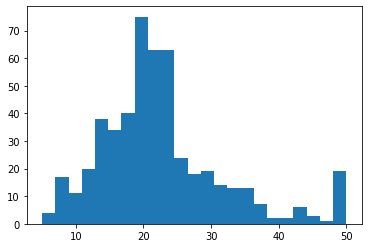

In [12]:
plt.hist(datos.target, bins='auto')
plt.show()

In [13]:
import pandas as pd
preds = pd.DataFrame({'actual': datos.target, 'pred': y_pred})
preds = preds.sort_values('actual')
preds.head(15)

,actual,pred
398,5.0,6.360404
405,5.0,8.615701
400,5.6,11.277428
399,6.3,10.520660
414,7.0,-5.460697
489,7.0,8.004153
401,7.2,17.787843
385,7.2,8.051415
415,7.2,8.967718
387,7.4,5.938398
